In [1]:
import time
import numpy as np
import scipy
from regions import CircleSkyRegion
from astropy.io import fits
from astropy import wcs
import astropy.units as u
from astropy.stats import sigma_clip
from astropy.utils.data import download_file
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from spectral_cube import SpectralCube
from astropy.convolution import Gaussian2DKernel
import aplpy  
from astropy.coordinates import SkyCoord as sc
import regions 
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 27
plt.rcParams['axes.labelsize'] = 27
plt.rcParams['xtick.labelsize'] = 27
plt.rcParams['ytick.labelsize'] =27
plt.rcParams['legend.fontsize'] = 27
plt.rcParams['figure.titlesize'] = 27
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

RA_alma=247.0900625    
Dec_alma=-24.6067583

RA = 247.0901709 
Dec =-24.6065499




from lmfit.models import GaussianModel, LorentzianModel, VoigtModel, ExpressionModel, ConstantModel,LinearModel


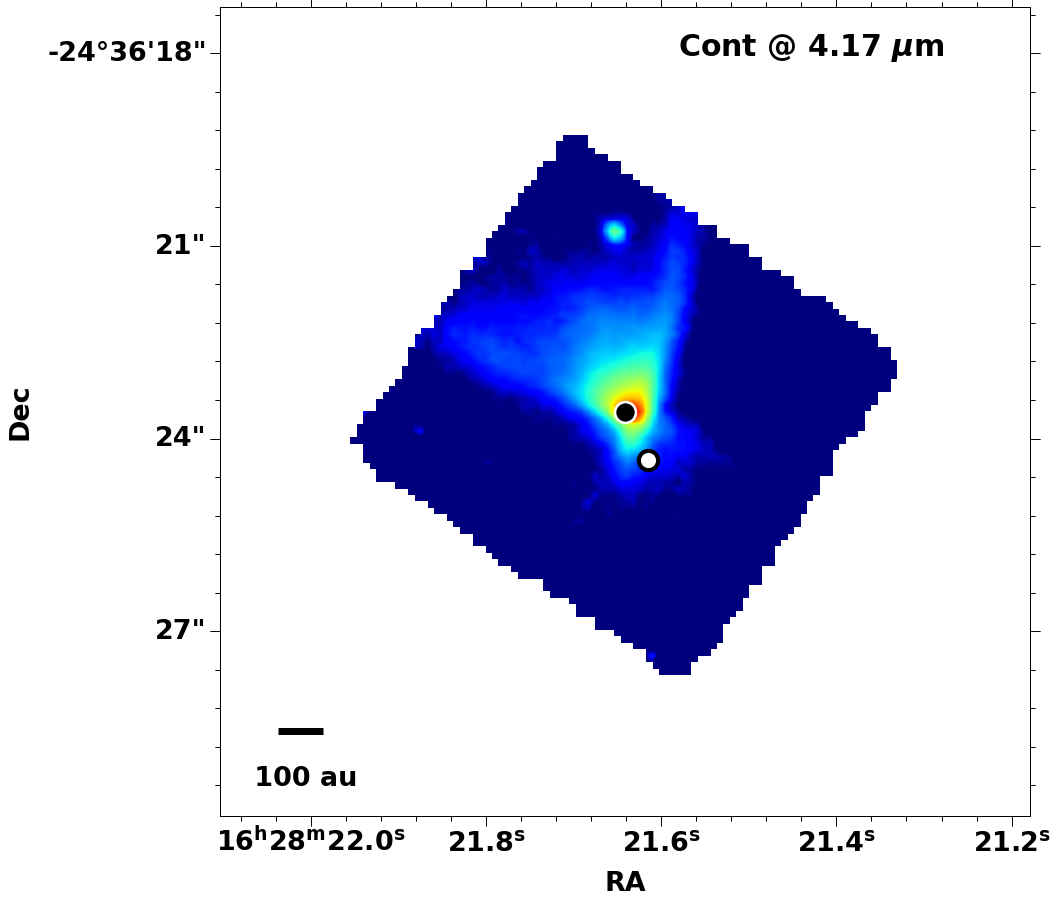

In [2]:
file='jw01802-o015_t012_nirspec_g395m-f290lp_crop1_s3d.fits'
with fits.open(file, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    cdelt1 = hdr["CDELT1"]
    cdelt2 = hdr["CDELT2"]

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



w1, w2 = 4.187, 4.195
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 
moment_0.write('cont_41.fits',overwrite=True)

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.01,vmax=3,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 4.17 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)

fig.savefig('Fig2b.png')

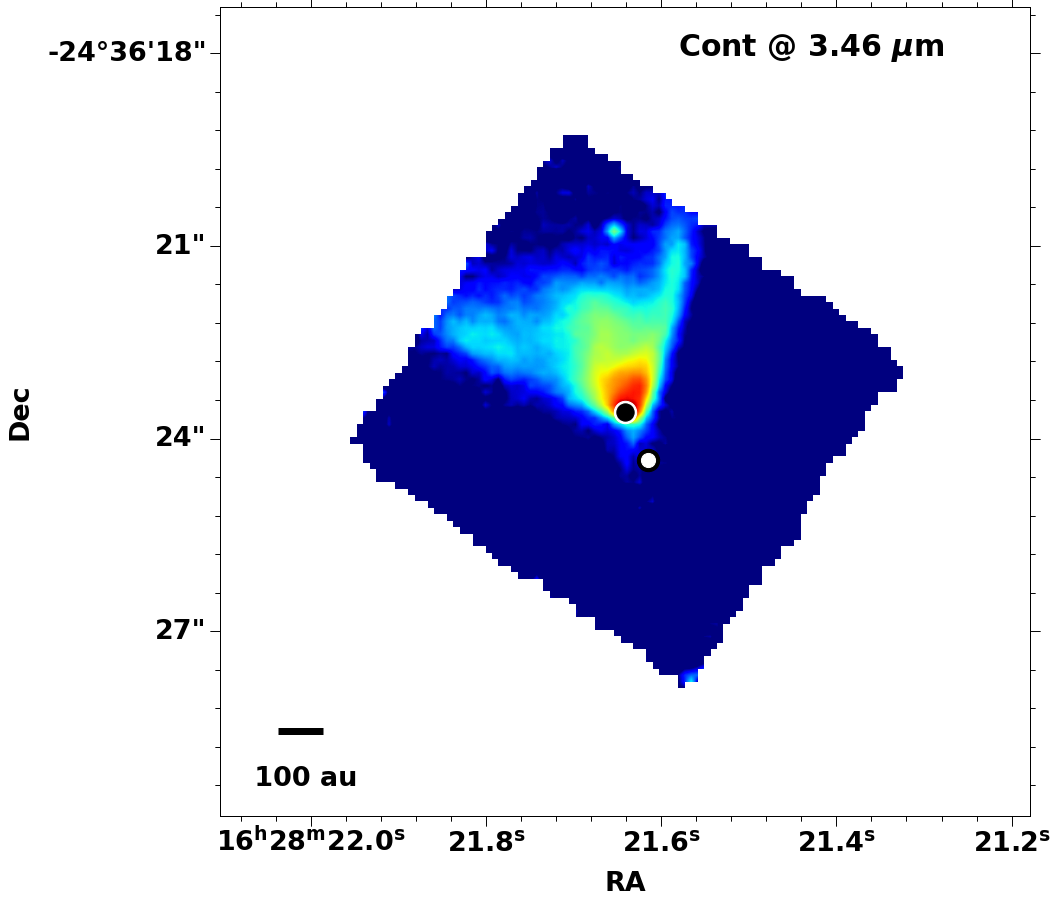

In [3]:
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



w1, w2 = 3.46, 3.47
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 




import aplpy  

#fix_aplpy_fits(f)
fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.01,vmax=0.2,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 3.46 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2a.png')

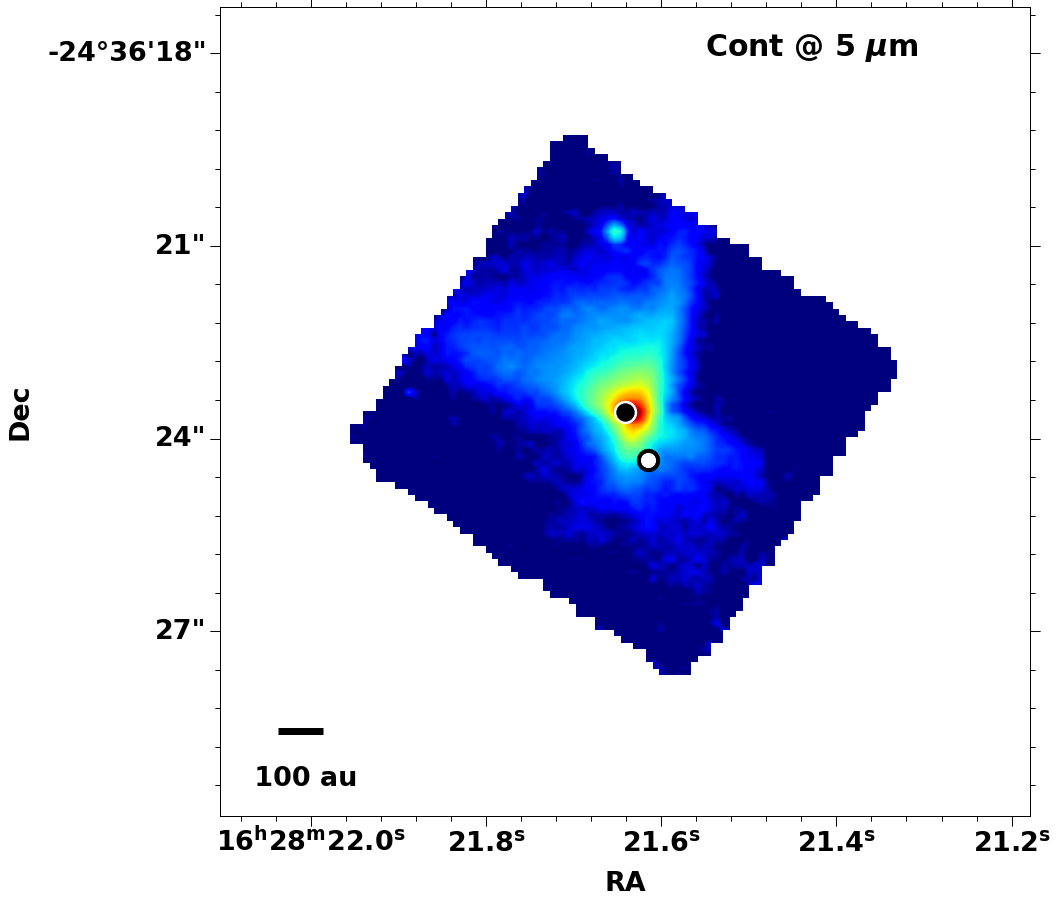

In [4]:
cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



w1, w2 =5.01, 5.015
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 




fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.01,vmax=5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 5 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2c.png')

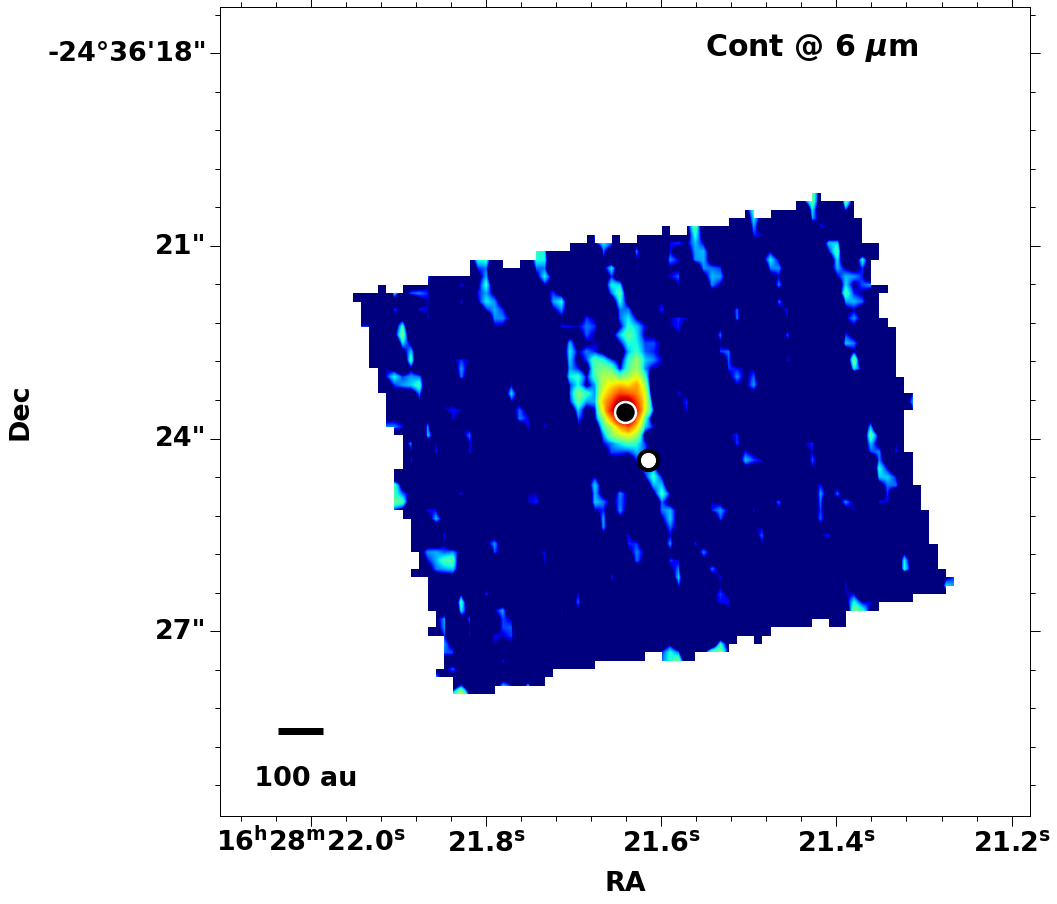

In [5]:
filename = "Level3_ch1-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


w1, w2 = 6.0, 6.05
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 



fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.08,vmax=5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 6 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2d.png')

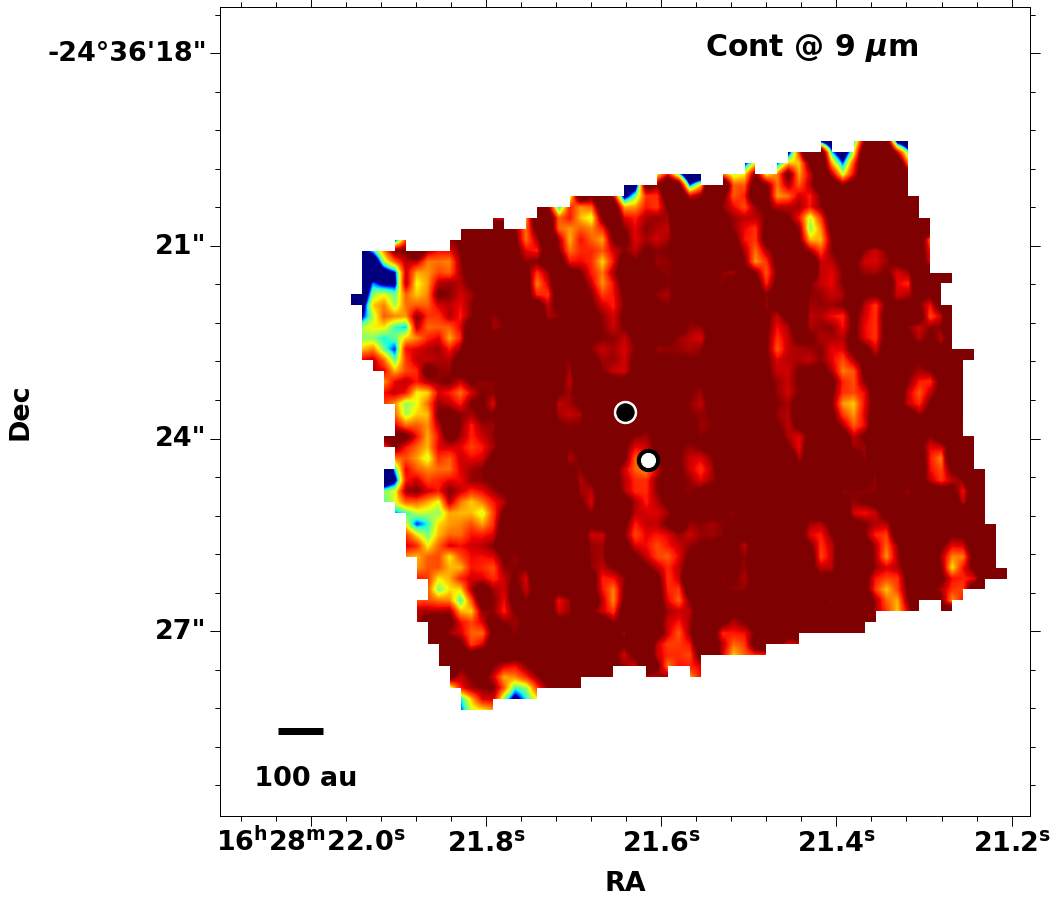

In [6]:
filename = "Level3_ch2-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  


w1, w2 = 9.0, 9.05
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 



fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.07,vmax=0.5,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 9 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2e.png')

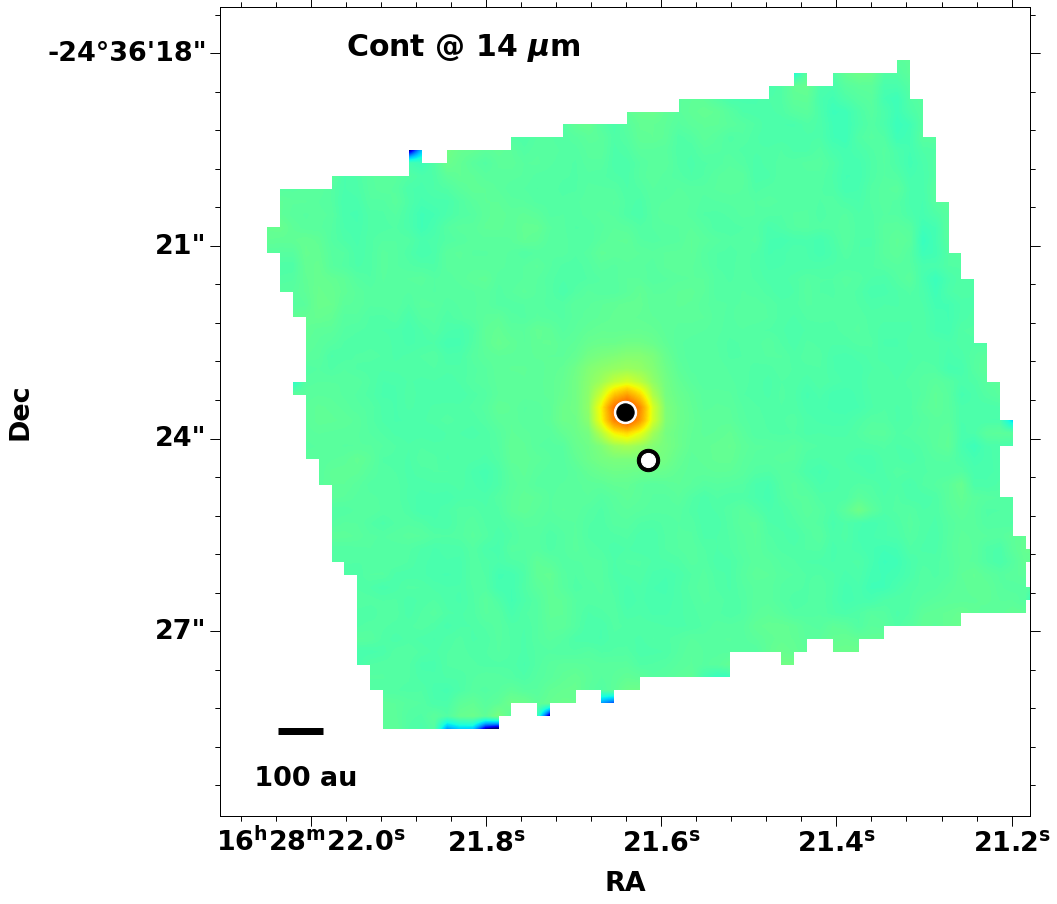

In [7]:
filename = "Level3_ch3-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



w1, w2 = 14, 14.05
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 


fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=0.5,vmax=15,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.3, 0.95, 'Cont @ 14 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2f.png')

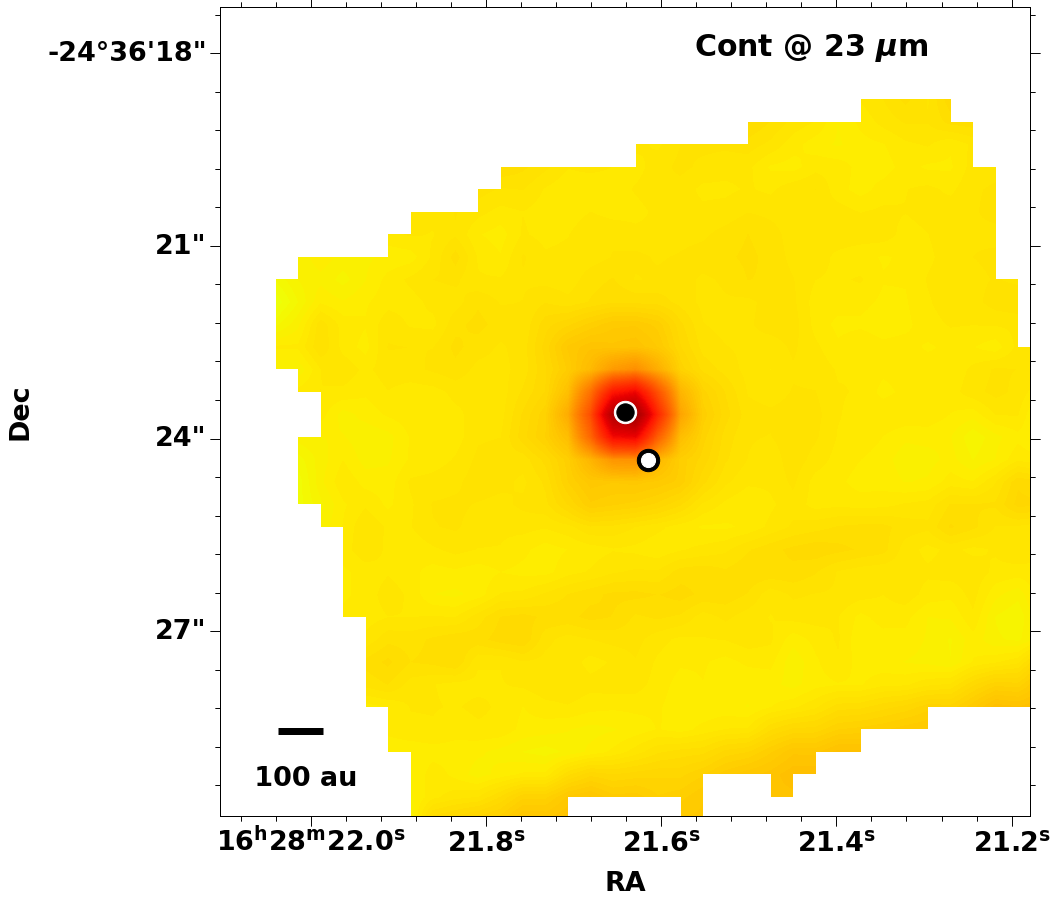

In [8]:
filename = "Level3_ch4-medium_s3d.fits"
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    #print(hdr)

cube = SpectralCube.read(hdulist[1])
    
new_mask = (cube !=0* u.MJy / u.sr) 

cube = cube.with_mask(new_mask)  



w1, w2 = 23, 23.05
subcube2 = cube.spectral_slab(w1*u.micron, w2*u.micron)
med2 = subcube2.median(axis=0)  

moment_0 = subcube2.moment(order=0) 

fig = aplpy.FITSFigure(moment_0.hdu, north=True,figsize=[15,15]) 
#fix_aplpy_fits(f)
fig.show_colorscale( vmin=1,vmax=100,stretch ='log',smooth=None,interpolation='bilinear',cmap='jet')  
fig.add_scalebar(0.7/3600.)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('\n 100 au')
fig.scalebar.set_color('k')
fig.scalebar.set_linewidth(7)
#fig.add_colorbar()
#fig.colorbar.set_axis_label_text('Flux density (Jy*m/sr)')
fig.add_label(0.73, 0.95, 'Cont @ 23 $\mu$m', relative=True,c='k',size=30)
fig.axis_labels.set_xtext('RA')
fig.axis_labels.set_ytext('Dec')
fig.recenter(RA, Dec, width=0.0035, height=0.0035)
plt.tight_layout()
fig.show_markers(RA, Dec, c='w',s=500)
fig.show_markers(RA, Dec, c='k',s=300)
fig.show_markers(RA_alma, Dec_alma, c='k',s=500)
fig.show_markers(RA_alma, Dec_alma, c='w',s=200)
fig.savefig('Fig2g.png')